# Predicting Alumni Salary of Forbes' America's Top Colleges 2019

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cleaning Data</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Dropping-Data" data-toc-modified-id="Dropping-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Dropping Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Funding" data-toc-modified-id="Funding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Acceptance-Rate" data-toc-modified-id="Acceptance-Rate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Acceptance Rate</a></span></li><li><span><a href="#Test-Scores" data-toc-modified-id="Test-Scores-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Test Scores</a></span></li><li><span><a href="#Population" data-toc-modified-id="Population-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Population</a></span></li><li><span><a href="#Tuition" data-toc-modified-id="Tuition-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Tuition</a></span></li><li><span><a href="#College-Type" data-toc-modified-id="College-Type-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>College Type</a></span></li><li><span><a href="#Location" data-toc-modified-id="Location-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Location</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Gradient-Boosting-Regressor" data-toc-modified-id="Gradient-Boosting-Regressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Residual-Plot" data-toc-modified-id="Residual-Plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Residual Plot</a></span></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Importances</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></li></ul></div>

The purpose of this project is to predict the median salaries for alumni of various colleges. As a college student myself, I found this subject particularly interesting, and I hope to gain interesting insights in to which factors about a school can help determine future earnings. The data used is from Forbes Magazine's America's Top Colleges 2019 list. The packages used in this project are listed below.

In [1]:
#import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

import cartopy.crs as crs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
from geopy import geocoders  
import shapely.geometry as sgeom

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from dsutility import prediction_error_chart #code I wrote

In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

## Data Processing

### Loading Data

I created a web scraper using BeautifulSoup to take data from forbes.com and save it as a csv file. The source contains information for 650 colleges across the United States. The columns in the dataset include:
1. Rank - College ranking by Forbes Magazine, based on alumni salary, student satisfaction, student debt, American leaders, on-time graduation rate, and academic success
2. Name - Name of the college
3. City & State - Location of the college campus
4. Public/Private - Whether school is publicly or privately funded
5. Undergraduate Population - Number of enrolled undergraduate students
6. Student Population -Total number of students enrolled 
7. Net Price - Average cost for one year of education subtracting any financial aid received by the students
8. Average Grant Aid - Average amount of money students receive each year to help pay for college, from sources such as the government or the university itself
9. Total Annual Cost - Total cost of tuition, room and board, and any additional fees that the college charges per year
10. Alumni Salary - Median salary for workers with 10 or more years of experience (payscale.com)
11. Acceptance Rate - Percentage of studets who apply to a college that are admitted
12. SAT Composite Range - First and third quartile composite SAT scores help by a college's student body
13. ACT Composite Range - First and third quartile composite ACT scores help by a college's student body
14. Website - URL for college's website

In [2]:
#load in data collected from web scrapper
df = pd.read_csv(r'C:\Users\CCCam\OneDrive\DataScience\ForbesTopUniversities2019\ForbesAmericasTopColleges2019Original.csv')
df.head()

,Rank,Name,City & State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Composite Range,ACT Composite Range,Website
0,#1,Harvard University,"Cambridge, MA",Private,"13,844","31,120","$14,327","$49,870","$69,600","$146,800",5%,1460-1590,32-35,www.harvard.edu
1,#2,Stanford University,"Stanford, CA",Private,"8,402","17,534","$13,261","$50,134","$69,109","$145,200",5%,1390-1540,32-35,www.stanford.edu
2,#3,Yale University,"New Haven, CT",Private,"6,483","12,974","$18,627","$50,897","$71,290","$138,300",7%,1460-1580,32-35,www.yale.edu
3,#4,Massachusetts Institute of Technology,"Cambridge, MA",Private,"4,680","11,466","$20,771","$43,248","$67,430","$155,200",7%,1490-1570,33-35,web.mit.edu
4,#5,Princeton University,"Princeton, NJ",Private,"5,659","8,273","$9,327","$48,088","$66,150","$139,400",6%,1430-1570,31-35,www.princeton.edu


### Cleaning Data

The csv file contains the raw data gathered from the website. To clean the data, we need to accomplish three main things:
1. Extract the city and state from the 'City & State' column
2. Remove punctuation from numerical columns and convert them to an appropriate data type
3. Extract upper and lower values from the test score range columns

In [3]:
#extract City and State from 'City & State' (some rows have only state information)
df['City'] = df['City & State'].apply(lambda x:  x.split(', ')[0] if len(x.split(', '))==2 else np.NaN) 
df['State'] = df['City & State'].apply(lambda x: x.split(', ')[-1])
locations = df['City & State']
df.drop(columns='City & State', inplace =True)

#remove punctuation from columns and convert to numeric
for column in ['Rank','Undergraduate Population','Student Population','Total Annual Cost','Alumni Salary', 'Net Price',
               'Average Grant Aid','Acceptance Rate']:
    for char in ['#',',','$','%']:
        df[column] = df[column].apply(lambda x: x.replace(char,'') if x == x else np.NaN)
    df[column] = df[column].astype(float)

#extract upper and lower standardized test score values
df['SAT Lower'] = df['SAT Composite Range'].apply(lambda x: int(x.split('-')[0]) if x==x else np.NaN)
df['SAT Upper']= df['SAT Composite Range'].apply(lambda x: int(x.split('-')[1]) if x==x else np.NaN)
df['ACT Lower'] = df['ACT Composite Range'].apply(lambda x: int(x.split('-')[0]) if x==x else np.NaN)
df['ACT Upper'] = df['ACT Composite Range'].apply(lambda x: int(x.split('-')[1]) if x==x else np.NaN)
df.drop(columns = ['SAT Composite Range', 'ACT Composite Range'], inplace =True)

Here, we reorganize the columns in the dataframe and save the cleaned version to a new csv file. 

In [4]:
#reorganize columns and save cleaned dataset
df = df[['Rank','Name','City','State','Public/Private','Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost','Alumni Salary','Acceptance Rate','SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper','Website']]
df.to_csv('ForbesAmericasTopColleges2019.csv',index=False)
df.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


### Missing Values

Many of the values in the data are missing. In this section we will deal with thie unknown information. The call below shows the incomplete columns in the dataset. There are missing values for city, net price, average grant aid, alumni salary, acceptance rate, website, and test scores.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    float64
 6   Student Population        650 non-null    float64
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    float64
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

For the numerical columns with missing data, we will group the data by state and funding type, and impute values based on the mean. 

In [6]:
#fill NaN values in numerical columns
for column in ['Acceptance Rate', 'SAT Upper','SAT Lower','ACT Upper','ACT Lower','Net Price','Average Grant Aid']:
    df[column]=df[column].fillna(df.groupby(['State','Public/Private'])[column].transform('mean'))

Some cities are missing. These colleges are displayed below.

In [7]:
df[df['City'].isnull()]

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
302,303.0,Maryland Institute College of Art,NaN,MD,Private,2041.0,2128.0,38763.0,18939.0,62850.0,84500.0,62.0,1060.000000,1290.000000,24.000000,29.000000,NaN
401,402.0,California Institute of the Arts,NaN,CA,Private,991.0,1498.0,46101.0,15401.0,68993.0,91000.0,24.0,1168.259259,1350.407407,24.740741,29.592593,NaN
403,404.0,Berklee College of Music,NaN,MA,Private,6762.0,6952.0,47270.0,19811.0,63574.0,84200.0,53.0,1283.888889,1452.944444,28.500000,32.222222,NaN


Doing some research, I found the cities these colleges are located in, and manually entered the data. 

In [8]:
#manually enter missing city data
df.iloc[302, 2] = 'Baltimore'
df.iloc[401, 2] = 'Santa Clarita'
df.iloc[403, 2] = 'Boston'

As we can see, all columns in the dataset are now complete except for alumni salary and website. I will leave these as is because it does not makes sense to impute alumni salary (the target feature), and the college website urls will not be used in any future computations. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      650 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    float64
 6   Student Population        650 non-null    float64
 7   Net Price                 650 non-null    float64
 8   Average Grant Aid         650 non-null    float64
 9   Total Annual Cost         650 non-null    float64
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           650 non-null    float64
 12  SAT Lower                 650 non-null    float64
 13  SAT Upper                 650 non-null    float64
 14  ACT Lower 

### Feature Engineering

Now that the data has been prepared, we will create new features that may have have an impact on predicting alumni salary. In this section, the three objectives are to:
1. Take the middle values of the test score ranges. This will provide a more accurate representation of the typical score for each test at a college.

2. Get the ratio of middle ACT score to SAT score for each college. This will show how much a school weights one test over the other.

3. Find the proportion of undergraduate students to total students. This will show how much of a focus each college puts on its undergraduates. 

4. Categorize the type of college based on its name. Words such as 'University', and 'Institute' appear frequently in the names of colleges, so we will see if designations such as these have any impact on alumni earnings. 

In [10]:
#middle value of test score ranges
df['SAT Middle'] = (df['SAT Lower']+df['SAT Upper'])/2
df['ACT Middle'] = (df['ACT Lower']+df['ACT Upper'])/2

#'weighting' of ACT vs SAT
df['ACT/SAT Weight'] = (df['ACT Middle']/df['SAT Middle'])

#calculate proportion of undergrads to total students
df['Undergrad_prop'] = df['Undergraduate Population']/df['Student Population']

#categorize type of school based on name
df['University'] = df['Name'].apply(lambda x: True if x.find('University')!= -1 else False)
df['College'] = df['Name'].apply(lambda x: True if x.find('College')!= -1 else False)
df['Institute'] = df['Name'].apply(lambda x: True if x.find('Institute')!= -1 else False)
df['School'] = df['Name'].apply(lambda x: True if x.find('School')!= -1 else False)
df['Academy'] = df['Name'].apply(lambda x: True if x.find('Academy')!= -1 else False)

df.describe()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,SAT Middle,ACT Middle,ACT/SAT Weight,Undergrad_prop
count,650.00000,650.000000,650.000000,650.000000,650.000000,650.000000,635.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,325.50000,10002.692308,12022.290769,22350.681298,19966.783767,50330.175385,98851.968504,61.595992,1116.470772,1313.917692,23.472258,28.576252,1215.194232,26.024255,0.021376,0.851454
std,187.78312,11162.172430,13175.091581,8261.381836,11172.986345,13223.055038,14335.249458,22.009444,122.638169,108.407879,3.580543,2.918718,114.062754,3.210792,0.001086,0.143043
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000,964.000000,17.500000,0.016484,0.232771
25%,163.25000,2020.250000,2240.750000,16436.000000,9251.000000,39917.000000,88600.000000,48.000000,1030.000000,1235.000000,21.000000,27.000000,1137.500000,23.625000,0.020748,0.785172
50%,325.50000,4503.000000,6269.000000,22011.500000,19530.000000,50265.000000,96400.000000,67.000000,1100.000000,1305.000000,23.000000,28.000000,1199.392857,25.500000,0.021525,0.901800
75%,487.75000,15657.000000,17788.000000,27585.500000,27431.000000,60771.750000,105600.000000,78.000000,1185.000000,1372.500000,25.028571,30.250000,1275.000000,28.000000,0.022089,0.957930
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000,1560.000000,34.500000,0.024873,0.999928


### Dropping Data

All of the information we want is now part of the dataframe, so we may drop any columns that are unneeded. The following will be removed from the data:
1. Website - It doesn't make sense that information from a college's url can help predict the salary of its alumni
2. Name - We have already extracted the college type from this column, so we will eliminate it to prevent the models from memorizing the salary for a particular school
3. Rank - The ranking methodology Forbes uses factors in alumni salary, so it would not make sense to predict earnings from this feature. Also, many different college ranking lists exist, so by removing this column, the model can generalize to schools that are not in this list
4. Rows with Alumni Salary missing - This is the target feature, so any row where this information is not present should be removed

In [11]:
#drop columns that will not be used in machine learning models
df = df.drop(columns=['Website','Name','Rank'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 649
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      635 non-null    object 
 1   State                     635 non-null    object 
 2   Public/Private            635 non-null    object 
 3   Undergraduate Population  635 non-null    float64
 4   Student Population        635 non-null    float64
 5   Net Price                 635 non-null    float64
 6   Average Grant Aid         635 non-null    float64
 7   Total Annual Cost         635 non-null    float64
 8   Alumni Salary             635 non-null    float64
 9   Acceptance Rate           635 non-null    float64
 10  SAT Lower                 635 non-null    float64
 11  SAT Upper                 635 non-null    float64
 12  ACT Lower                 635 non-null    float64
 13  ACT Upper                 635 non-null    float64
 14  SAT Middle

## Exploratory Data Analysis

### Funding

We will begin by examining the funding type for colleges in the dataset. The majority of colleges are private, with public schools making up only about 40% of the list. There doen't appear to be a significant difference between the median alumni salary between public and private schools, however, the spread seems to be larger for private schools. In general, the distribution of alumni salaries seem to be skewed heavily to the right.

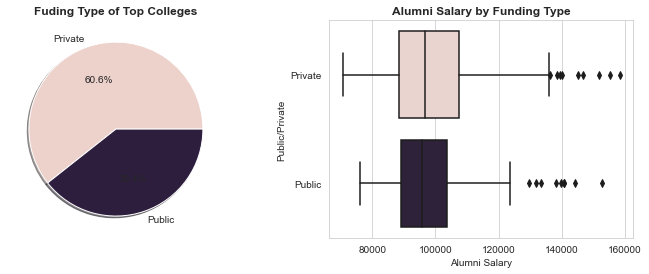

In [12]:
#set up figure
sns.set_palette(sns.cubehelix_palette(2))
sns.set_style('whitegrid')
fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(12,4))

#pie chart of funding type
ax0.pie(df['Public/Private'].value_counts(),labels=['Private','Public'],shadow=True,autopct='%1.1f%%')
ax0.set_title('Fuding Type of Top Colleges',fontweight='bold')

#boxplots of alumni salary by funding type
sns.boxplot(data=df,x='Alumni Salary',y='Public/Private',ax=ax1)
ax1.set_title('Alumni Salary by Funding Type',fontweight='bold')

plt.show()

### Acceptance Rate

Next, we will take a look at acceptance rates of colleges in the dataset. It appears that private schools tend to be more selective than public schools, and the majority of highly selective schools are private. There seems to be a non-linear relationship between acceptance rate and alumni salary, with alumni from more selective schools having higher earnings. 

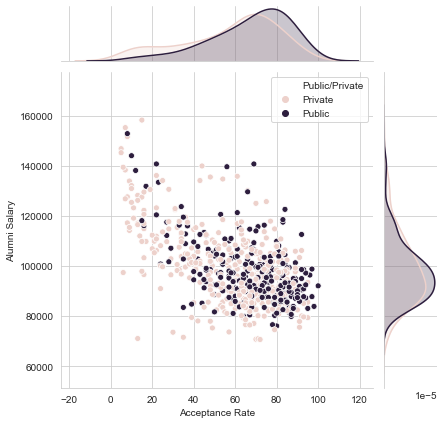

In [13]:
#scatterplot of acceptance salary and alumni salary
grid = sns.JointGrid(data=df, x = 'Acceptance Rate', y= 'Alumni Salary')
g = grid.plot_joint(sns.scatterplot, hue='Public/Private', data =df)

#kde plot of acceptance rate
sns.kdeplot(df.loc[df['Public/Private']=='Private', 'Acceptance Rate'], ax=g.ax_marg_x, legend=False,shade=True)
sns.kdeplot(df.loc[df['Public/Private']=='Public', 'Acceptance Rate'], ax=g.ax_marg_x, legend=False,shade=True)

#kde plot of alumni salary
sns.kdeplot(df.loc[df['Public/Private']=='Private', 'Alumni Salary'], ax=g.ax_marg_y, vertical=True, legend=False,shade=True)
sns.kdeplot(df.loc[df['Public/Private']=='Public', 'Alumni Salary'], ax=g.ax_marg_y, vertical=True, legend=False,shade=True)

plt.show()

### Test Scores

Moving on to test scores, we can clearly see SAT and ACT scores are highly correlated. Schools with higher average test scores tend to be private. There appears to be a positive correlation between average test scores of a college and earnings of its alumni. 

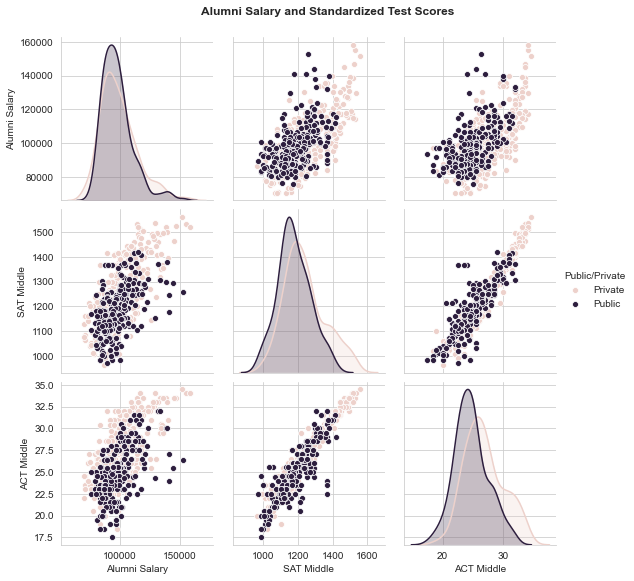

In [14]:
#pairplot for standardized test scores and alumni salary
sns.pairplot(data=df, vars = ['Alumni Salary','SAT Middle','ACT Middle'],hue='Public/Private')
plt.suptitle('Alumni Salary and Standardized Test Scores',fontweight='bold',y=1.05)
plt.show()

### Population

Now, we will examine the population of colleges in the dataset. Private school clearly have small student populations, where for public schools the distribution is more spread. It seems that there may be a positive correlation with school population and alumni salary, but only for public schools. 

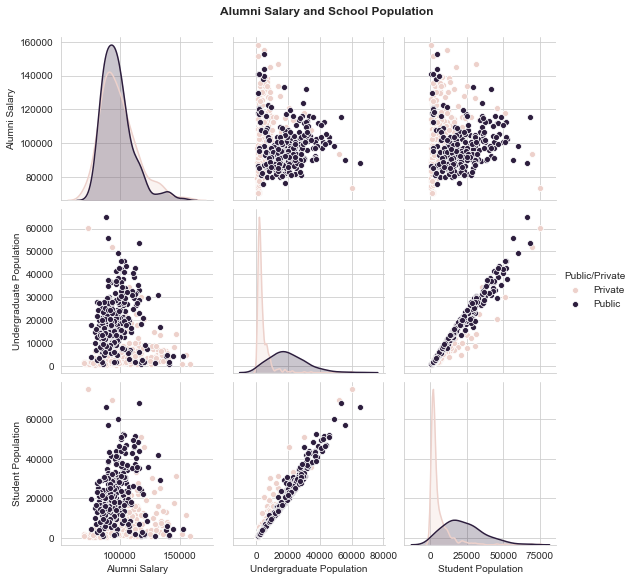

In [15]:
#pairplot of student population and alumni salary
sns.pairplot(data=df, vars = ['Alumni Salary','Undergraduate Population','Student Population'],hue='Public/Private')
plt.suptitle('Alumni Salary and School Population',fontweight='bold',y=1.05)
plt.show()

### Tuition

Next, we have tuition. As we can see, private schools tend to cost more, but give out more grant aid than public schools. Total annual cost seems to have a positive correlation with alumni salary, as does average grant aid, but only for private schools. Average grant aid and total annual cost are highly correlated with eachother, so it makes sense they have the same relation with alumni salary. There doesn't seem to be much of a correlation with net price and alumni salary.

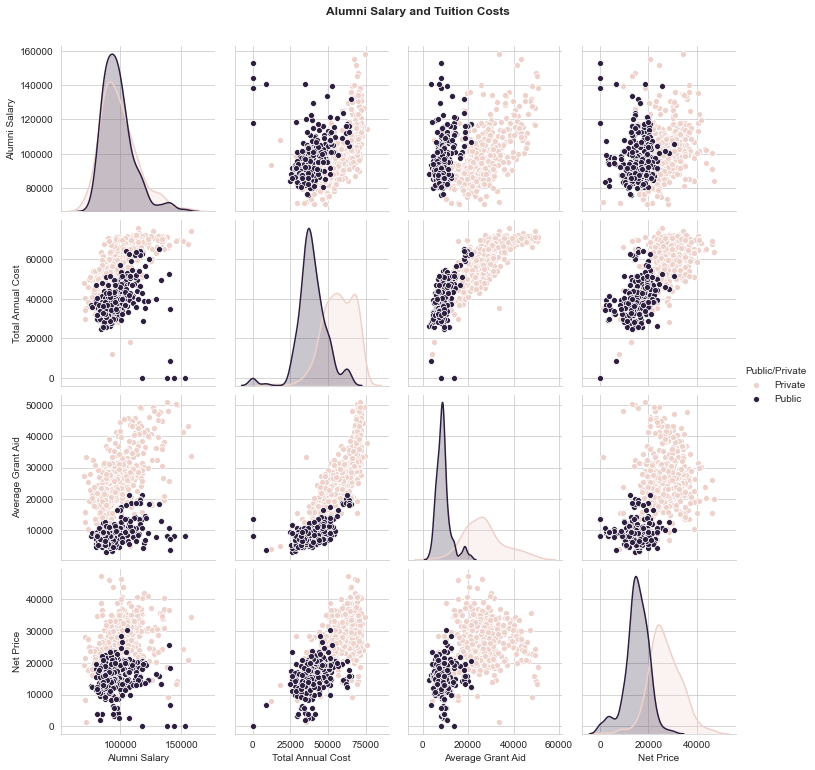

In [16]:
#pairplot of features related to tuition and alumni salary
sns.pairplot(data=df, vars = ['Alumni Salary','Total Annual Cost','Average Grant Aid', 'Net Price'],hue='Public/Private')
plt.suptitle('Alumni Salary and Tuition Costs',fontweight='bold',y=1.05)
plt.show()

### College Type

The vast majority of schools in the dataset fall under the 'University' and 'College' category. Schools with 'College' designation seem to have slightly higher earning alumni. Schools with 'Academy' in their name have the highest median alumni salary by far, but with so few data points in this category, this figure may not be that reliable. 

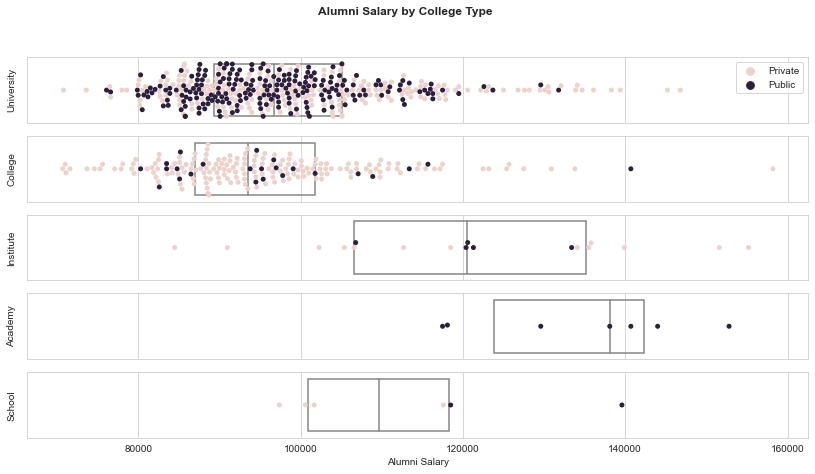

In [17]:
#set up figure
fig, axes = plt.subplots(nrows=5,sharex=True,figsize=(14,7))

i= 0
for kind in ['University','College','Institute','Academy','School']:
    #group college based on type
    group = df[df[kind]==1]
    
    #create swarmplot with boxplot overlay for college type and alumni salary
    sns.swarmplot(x=group['Alumni Salary'],y=['']*len(group),hue=group['Public/Private'],hue_order=['Private','Public'], ax = axes[i])
    sns.boxplot(data=group,x='Alumni Salary',ax=axes[i],boxprops={'facecolor':'None'},showcaps=False,showfliers=False,whiskerprops={'linewidth':0})
    
    #clean up chart
    axes[i].set(ylabel=kind,xlabel=None)
    axes[i].get_legend().remove()
    
    i+=1

#annotate chart
plt.suptitle('Alumni Salary by College Type',fontweight='bold')
axes[0].legend()
axes[-1].set(xlabel='Alumni Salary')

plt.show()

### Location

Finally, we will observe the locations of the colleges in the dataset that are within the contiguous United States. The code below fetches the coordinates of each college in the list.

In [18]:
geolocator = Nominatim(user_agent='myapplication') #initialize geolocator

counts=pd.crosstab(columns=df['Public/Private'],index=[df['State'],df['City']]) #dataframe of college counts at each city 

#lists to store location data
lons =[] 
lats =[] 
nums =[]
fundings =[]

for funding in counts:
    for loc, count in zip(counts.index,counts[funding]):
        #skip if no colleges at that location
        if count==0:
            continue
        
        #fetch location
        location = geolocator.geocode(loc[0]+', '+loc[1]+', US')
        
        #skip if location not found
        if location is None or str(location).split(', ')[-1]!='United States of America':
            continue
            
        #store data
        lats.append(location.latitude)
        lons.append(location.longitude)
        nums.append(count)
        fundings.append(funding)

We will now use this data to plot the locations of the colleges on a map. Most colleges seem to be concentrated in the northeast, and the further west you go, the higher the proportion of public colleges.

C:\Users\CCCam\Miniconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


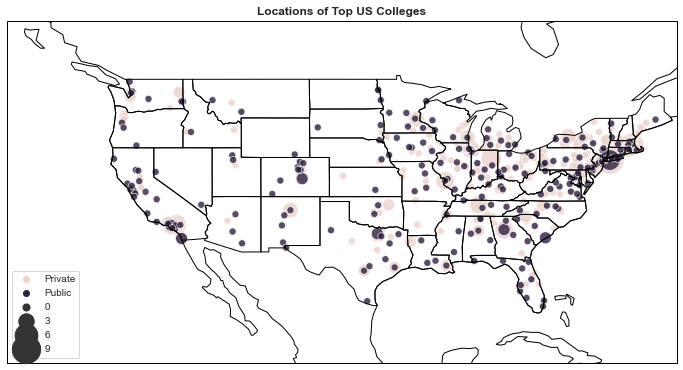

In [19]:
#set up map
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())
#ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.set_extent([-135, -66.5, 20, 55], crs=crs.PlateCarree())

#plot colleges
sns.scatterplot(x=lons, y=lats,size=np.array(nums),sizes=(50,800),hue=fundings, hue_order=['Private','Public'],
                alpha=.8,transform=crs.PlateCarree())

#annotate map
plt.title('Locations of Top US Colleges',fontweight='bold')
plt.legend(loc='lower left')

plt.show()

Below, we plot the average salaries of the five most frequent states and cities. Of these, Massachusetts and California college have the highest earning alumni.

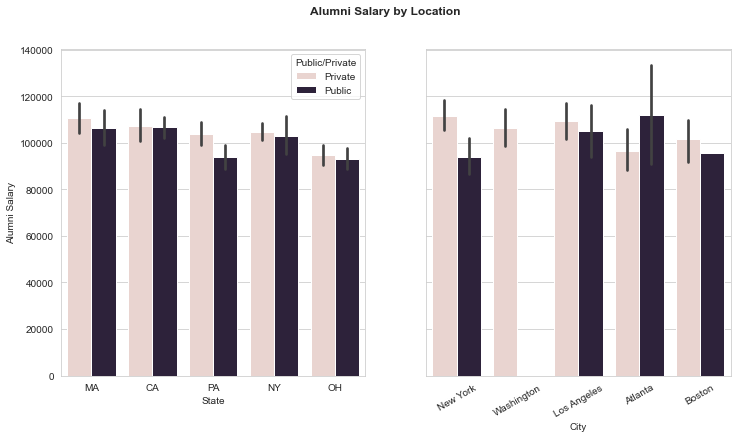

In [20]:
#set up figure
fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(12,6))
plt.suptitle('Alumni Salary by Location',fontweight='bold')  

#plot top states and alumni salary
states = df['State'].value_counts().index.to_list()[:5]
sns.barplot(data = df[df['State'].isin(states)],y= 'Alumni Salary', x='State',ax =axes[0],hue='Public/Private')

#plot top cities and alumni salary
cities = df['City'].value_counts().index.to_list()[:5]
g = sns.barplot(data = df[df['City'].isin(cities)],y = 'Alumni Salary', x='City',ax =axes[1],hue='Public/Private')
g.set_xticklabels(g.get_xticklabels(), rotation=30)

#clean up chart
axes[1].set_ylabel('') 
axes[1].get_legend().remove()

plt.show()

## Model Building

### Splitting Data

The time has almost come to fit machine learning models to the dataset. Before we can do this, we need to prepare the data a little bit more. Here, I use get_dummies() to convert the categorical features to numerical, and seperate the independent and dependent variables.

In [21]:
#seperate features and target variable
X = df.drop(columns='Alumni Salary')
X = pd.get_dummies(X)
y = df['Alumni Salary']

X.head()

,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Public/Private_Private,Public/Private_Public
0,13844.0,31120.0,14327.0,49870.0,69600.0,5.0,1460.0,1590.0,32.0,35.0,...,0,0,0,0,0,0,0,0,1,0
1,8402.0,17534.0,13261.0,50134.0,69109.0,5.0,1390.0,1540.0,32.0,35.0,...,0,0,0,0,0,0,0,0,1,0
2,6483.0,12974.0,18627.0,50897.0,71290.0,7.0,1460.0,1580.0,32.0,35.0,...,0,0,0,0,0,0,0,0,1,0
3,4680.0,11466.0,20771.0,43248.0,67430.0,7.0,1490.0,1570.0,33.0,35.0,...,0,0,0,0,0,0,0,0,1,0
4,5659.0,8273.0,9327.0,48088.0,66150.0,6.0,1430.0,1570.0,31.0,35.0,...,0,0,0,0,0,0,0,0,1,0


Next, I split the data in to train and test sets. A quarter of the data has been set aside for the test set. 

In [22]:
#split train and tests set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=.25)
X_train.head()

,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Public/Private_Private,Public/Private_Public
124,3967.0,4396.0,35329.0,23282.0,59236.0,70.0,1140.0,1320.0,23.0,29.00,...,0,0,0,0,0,0,0,0,1,0
39,3123.0,3213.0,29956.0,43276.0,69935.0,16.0,1207.5,1372.5,26.0,30.25,...,0,0,0,0,0,0,0,0,1,0
541,6259.0,6561.0,30440.0,21526.0,54662.0,81.0,1030.0,1230.0,21.0,27.00,...,0,0,0,0,0,0,0,0,1,0
484,26758.0,29317.0,16286.0,7385.0,37081.0,66.0,1110.0,1270.0,22.0,26.00,...,0,0,0,0,0,0,0,0,0,1
197,6424.0,9878.0,30503.0,21274.0,54647.0,84.0,1090.0,1330.0,24.0,29.00,...,0,0,0,0,0,0,0,0,1,0


### Benchmark

Now, we will create a benchmark to compare the results of the machine learning models against. The predictions for the benchmark will simply be the average alumni salary of the train set. Doing so results with an MAE score of approximately 10,000 on the train set, and 11,000 on the test set. We plot the residuals of the predictions and actual datasets below.

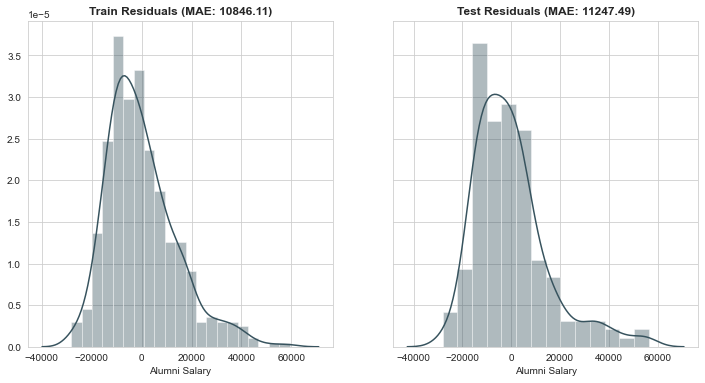

In [32]:
#predict average tuition of the train set
B_y_train_pred =[y_train.mean()]*y_train.shape[0]
B_y_test_pred = [y_train.mean()]*y_test.shape[0]

#plot residuals
train_resids = y_train-B_y_train_pred
test_resids = y_test - B_y_test_pred

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))

sns.set_palette(sns.color_palette("GnBu_d"))
sns.distplot(train_resids,ax = axes[0])
sns.distplot(test_resids,ax=axes[1])

#calculate MAE's
train_MAE = MAE(B_y_train_pred,y_train).round(2)
test_MAE = MAE(B_y_test_pred,y_test).round(2)

axes[0].set_title('Train Residuals (MAE: ' + str(train_MAE) + ')',fontweight='bold')
axes[1].set_title('Test Residuals (MAE: ' + str(test_MAE) + ')',fontweight='bold')

plt.show()

### Decision Tree Regressor

Due to multicolinearity between the features in the dataset, we will stick to tree based models for this project. We will start with Decision Tree Regressor. Below, the optimal hyperparameters from a 5-fold GridSearchCV are shown. 

In [24]:
#set hyperparamaters to test for
param_grid={'max_depth':np.arange(5,15),'max_features':['auto','log2','sqrt'],
           'min_samples_leaf':np.arange(1,4),'min_samples_split':np.arange(2,6)}

#find best combination of hyperparameters
clf = GridSearchCV(DecisionTreeRegressor(random_state=1),cv=5, param_grid=param_grid,scoring='neg_mean_absolute_error',n_jobs=-1)
clf.fit(X_train,y_train)

#display results
print('Best Hyperparameters:',clf.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}


Now, we fit the model using the hyperparameters from above. This model is a significant improvement from the benchmark, scoring 5,710.14 on the train set and 8853.68 on the test set. 

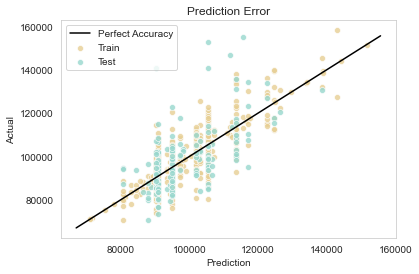

Train MAE: 5710.136116850577
Test MAE: 8853.677492657811


In [37]:
#fit model
DTR = DecisionTreeRegressor(random_state=1, max_depth =10,max_features='sqrt',min_samples_leaf=1,min_samples_split=4)
DTR.fit(X_train,y_train)

#make predictions
DTR_y_train_pred = DTR.predict(X_train)
DTR_y_test_pred = DTR.predict(X_test)

#show error plot
prediction_error_chart(y_train,y_test,DTR_y_train_pred,DTR_y_test_pred)

### Random Forest Regressor

Random Forest Regressor is the next model we will use. Because this is an ensemble model, we will use only 3 folds for the gridsearch. 

In [26]:
#set hyperparamaters to test for
param_grid={'max_depth':np.arange(5,15),'max_features':['auto','log2','sqrt'], 'n_estimators':np.arange(100,600,100),
            'min_samples_leaf':np.arange(1,4),'min_samples_split':np.arange(2,6)}

#find best combination of hyperparameters
clf = GridSearchCV(RandomForestRegressor(random_state=1),cv=3, param_grid=param_grid,scoring='neg_mean_absolute_error',n_jobs=-1)
clf.fit(X_train,y_train)

#display results
print('Best Hyperparameters:',clf.best_params_)

Best Hyperparameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}


This model scores much better than the previous, with an MAE of 2,910.15 on the train set and 6,993.13 on the test set.

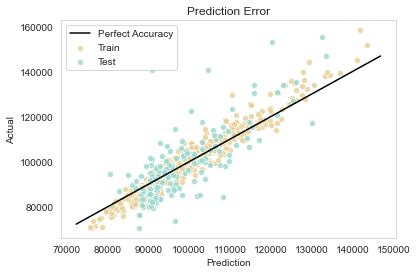

Train MAE: 2910.150492003157
Test MAE: 6993.133107439385


In [27]:
#fit model
RFR = RandomForestRegressor(random_state=1,max_depth=12,max_features='auto',min_samples_leaf=1,min_samples_split=3,
                            n_estimators = 500) 
RFR.fit(X_train,y_train)

#make predictions
RFR_y_train_pred = RFR.predict(X_train)
RFR_y_test_pred = RFR.predict(X_test)

#display results
prediction_error_chart(y_train,y_test,RFR_y_train_pred,RFR_y_test_pred)

### Gradient Boosting Regressor

Finally, we will use the Gradient Boosting Regressor model. This is another ensemble model, so we will use only 3 folds for the gridsearch.

In [28]:
#set hyperparamaters to test for
param_grid={'max_depth':np.arange(5,15),'max_features':['auto','log2','sqrt'], 'min_samples_leaf':np.arange(1,4),
            'min_samples_split':np.arange(2,6),'subsample':np.arange(.1,1.1,.1)}

#find best combination of hyperparameters
clf = GridSearchCV(GradientBoostingRegressor(random_state=1),cv=3, param_grid=param_grid,scoring='neg_mean_absolute_error',n_jobs=-1)
clf.fit(X_train,y_train)

#display results
print('Best Hyperparameters:',clf.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'subsample': 0.7000000000000001}


The Gradient Boosting Regressor scores slightly better than the Random Forest Regressor, with MAE's of 2,677.49 on the train set and 6,795.55 on the test set.

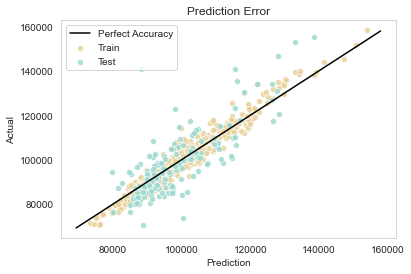

Train MAE: 2677.4929242821827
Test MAE: 6795.547680730132


In [29]:
#fit model
GBR = GradientBoostingRegressor(random_state=1,max_depth=10,max_features='sqrt',min_samples_leaf=2,
                                min_samples_split=2,subsample=.7) 
GBR.fit(X_train,y_train)

#make predictions
GBR_y_train_pred = GBR.predict(X_train)
GBR_y_test_pred = GBR.predict(X_test)

#display results
prediction_error_chart(y_train,y_test,GBR_y_train_pred,GBR_y_test_pred)

## Conclusion

### Residual Plot

Gradient Boosting Regressor had the best performance on the train and test set, so we will select this as the final model. We will compare the residual distributions of the benchmark predictions and our model's predictions. As we can see, the model fit the data very tightly to the train set, and was able to greatly narrow the distribution of the test set form the benchmark.

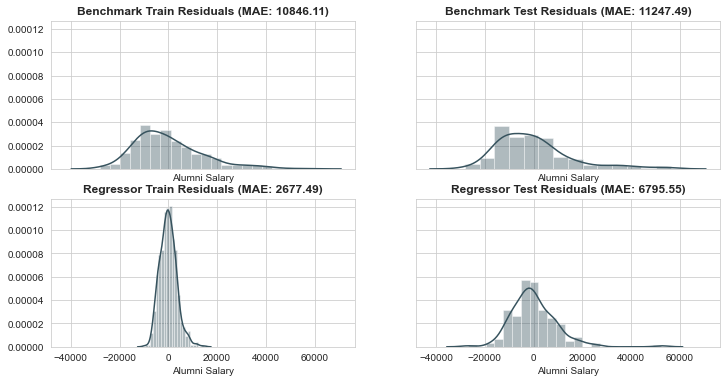

In [33]:
fig, axes = plt.subplots(ncols=2,nrows = 2, sharex = True, sharey=True, figsize=(12,6))

B_train_resids = y_train-B_y_train_pred
B_test_resids = y_test - B_y_test_pred

GBR_train_resids = y_train-GBR_y_train_pred
GBR_test_resids = y_test - GBR_y_test_pred

sns.set_palette(sns.color_palette("GnBu_d"))
sns.distplot(B_train_resids,ax = axes[0][0])
sns.distplot(GBR_train_resids,ax = axes[1][0])
sns.distplot(B_test_resids,ax=axes[0][1])
sns.distplot(GBR_test_resids,ax = axes[1][1])

GBR_train_MAE = MAE(GBR_y_train_pred,y_train).round(2)
GBR_test_MAE = MAE(GBR_y_test_pred,y_test).round(2)

axes[0][0].set_title('Benchmark Train Residuals (MAE: ' + str(train_MAE) + ')',fontweight='bold')
axes[0][1].set_title('Benchmark Test Residuals (MAE: ' + str(test_MAE) + ')',fontweight='bold')
axes[1][0].set_title('Regressor Train Residuals (MAE: ' + str(GBR_train_MAE) + ')',fontweight='bold')
axes[1][1].set_title('Regressor Test Residuals (MAE: ' + str(GBR_test_MAE) + ')',fontweight='bold')


plt.show()

### Feature Importances

Below, we fit the model over the entire dataset, and plot the 15 most important features. It seems the best features in predicting alumni salary are the ones that relate to the difficulty it takes to get in to the school (acceptance Rate, test scores). 

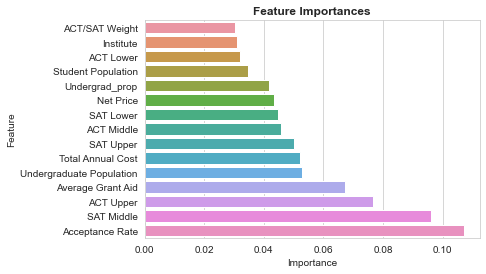

In [31]:
#fit model over entire dataset
GBR = GradientBoostingRegressor(random_state=1,max_depth=10,max_features='sqrt',min_samples_leaf=2,
                                min_samples_split=2,subsample=.7) 
GBR.fit(X,y)

#chart feature importances
feature_importances = pd.Series(GBR.feature_importances_,index = X_train.columns).sort_values()[-15:]
sns.barplot(y=feature_importances.index,x=feature_importances)

plt.title('Feature Importances',fontweight='bold')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

### Acknowledgements

1. America's Top Colleges 2019 (source of Data) - https://www.forbes.com/top-colleges/#6010771e1987 
2. CoderzColumn: Cartopy - Basic Maps [Scatter Map, Bubble Map & Connection Map] (helped in creating cartopy map) - https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map